In [1]:
import pandas as pd
import numpy as np
import csv
from dh2loop import dh2l
import psycopg2

/home/ranee/anaconda3/envs/dh2loop/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
%run -i "dh2l_config.py"

Default parameters loaded from dh2l_config.py:
#Database Files
data_path='../data/'
wamex_path='../data/wamex/'
collar_file=wamex_path+'collar.csv'
collarattr_file=wamex_path+'collarattr.csv'
dhsurvey_file=wamex_path+'dhsurvey.csv'
dhsurveyattr_file=wamex_path+'dhsurveyattr.csv'
dhgeology_file=wamex_path+'dhgeology.csv'
dhgeologyattr_file=wamex_path+'dhgeologyattr.csv'

#Thesauri
rl_maxdepth_dic_file= wamex_path+'rl_maxdepth_dic.csv'
survey_dic_file=wamex_path+'survey_dic.csv'
dic_attr_col_lithology_file=wamex_path+'dic_att_col_lithology.csv'
dic_attr_val_lithology_file=wamex_path+'dic_attr_val_lithology_filter.csv'
cleanup_lithology_file=wamex_path+'cleanup_lithology.csv'
litho_dic_file=wamex_path+'litho_dic_1.csv'
CET_hierarchy_dico_file=wamex_path+'hierarchy_dico.csv'

#ExportFiles
export_path='../data/export/'
DB_Collar_Export=export_path+'DB_Collar_Export.csv'
DB_Survey_Export=export_path+'DB_Survey_Export.csv'
DB_Survey_Export_Calc=export_path+'DB_Survey_Export_Calc.csv'
CET_Lith

## Geology

In [50]:
geology=pd.read_csv (DB_Lithology_Export_Calc)
geology=geology.rename(columns={"CollarID": "collarid", "FromDepth": "fromdepth", "ToDepth": "todepth", "CET_Litho":"comp lithology"})
geology['collarid'] = geology['collarid'].astype(int)
geology.head()

,Unnamed: 0,Company_ID,collarid,fromdepth,todepth,Company_LithoCode,Company_Litho,comp lithology,Score,Level_3,...,xbt,ybt,zbt,xmt,ymt,zmt,xet,yet,zet,Unnamed: 20
0,36,3050,548917,0.0,19.0,Fgd,granodiorite,granodiorite,101,granodiorite,...,514164.694405,6.747200e+06,331.316000,514168.725634,6.747200e+06,322.722624,514170.979020,6.747200e+06,313.520157,NaN
1,37,3050,548917,19.0,27.0,Fgd,granodiorite,granodiorite,101,granodiorite,...,514170.979020,6.747200e+06,313.520157,514171.204428,6.747200e+06,309.528639,514171.204428,6.747200e+06,305.528639,NaN
2,38,3050,548917,27.0,31.0,Fgd,granodiorite,granodiorite,101,granodiorite,...,514171.204428,6.747200e+06,305.528639,514171.204428,6.747200e+06,303.528639,514171.204428,6.747200e+06,301.528639,NaN
3,39,3050,548917,31.0,39.0,Fgd,granodiorite,granodiorite,101,granodiorite,...,514171.204428,6.747200e+06,301.528639,514171.204428,6.747200e+06,297.528639,514171.204428,6.747200e+06,293.528639,NaN
4,40,3050,548917,39.0,41.0,Fgd,granodiorite,granodiorite,101,granodiorite,...,514171.204428,6.747200e+06,293.528639,514171.204428,6.747200e+06,292.528639,514171.204428,6.747200e+06,291.528639,NaN


## Geochemistry

#### To extract geochemistry data make sure you are connected to UWA network

In [45]:
minlong=116.5
maxlong=117.2
minlat=-29.5
maxlat=-28.8
bounds=(minlong,maxlong,minlat,maxlat)  #query bounds

query = """SELECT  a.id, a.dhgeochemistryid, s.collarid, c.holeid, c.companyholeid, s.fromdepth, s.todepth,  a.attributecolumn, a.attributevalue
FROM public.dhgeochemistryattr AS a 
INNER JOIN public.dhgeochemistry AS s ON a.dhgeochemistryid = s.id
INNER JOIN public.collar AS c ON s.collarid = c.id
WHERE(longitude BETWEEN %s  AND %s AND latitude BETWEEN %s AND %s)
ORDER BY c.companyid ASC
"""
conn = psycopg2.connect(host="130.95.198.59", port = 5432, database="gswa_dh", user="postgres", password="loopie123pgpw")
cur = conn.cursor()
cur.execute(query, bounds)
dhchemistryattrygsb = pd.DataFrame(cur.fetchall())
cur.close()
conn.close()

In [46]:
dhchemistryattrygsb.columns = ['id', 'dhgeochemistryid', 'collarid', 'holeid', 'companyholeid', 'fromdepth', 'todepth',  'attributecolumn', 'attributevalue']
unique= dhchemistryattrygsb['attributecolumn'].unique().tolist()
print(unique)

['Fe_1', 'Pb(MAD)', 'Ag(MAD)', 'Ni(MAD)', 'Zn(MAD)', 'Cu(MAD)', 'Pd(FA)', 'Pt(FA)', 'Au(FA)', 'Cr_1', 'V_1', 'Ti_1', 'Pt(AR)', 'Ag(AR)', 'Ni(AR)', 'Zn(AR)', 'Cu(AR)', 'Au(AR)', 'Fe', 'V(AR)', 'Ti(AR)', 'Cr(AR)', 'Pb(AR)', 'Pd(AR)', 'V', 'Ti', 'Au(AR)_1', 'Au(FA)_1', 'Au_Batch_No', 'Sample_Type', 'DataSet', 'Au_ppm', 'Date_Sampled', 'Sampled_By', 'Data_Source', 'Has_Duplicate', 'Sample_Weight_kg', 'Sample_Category', 'Sample_Method', 'LOI 1000', 'Zn', 'WO3', 'W', 'Ta', 'Sn', 'S', 'Pb', 'Mo', 'Cu', 'Ca', 'Ba', 'As', 'Lab', 'Assay_code', 'Assay_Company', 'Sample Type', 'Au1_ppm', 'Comments', 'Au', 'Sample_Condition', 'Superseded', 'Sample_Recovery', 'Pt', 'Pd', 'Ars_ppm', 'Bi_ppm', 'Cr_ppm', 'Cu_ppm', 'Fe_pct', 'Mn_ppm', 'Ni_ppm', 'Pb_ppm', 'Sb_ppm', 'Zn_ppm', 'Ag_ppm', 'V_ppm', 'Mo_ppm', 'Co_ppm', 'Cd_ppm', 'Recvd Wt.', 'Ag', 'Auppm2', 'Batch_No', 'W_ppm', 'V2O5_ppm', 'TiO2_pct', 'SiO2_pct', 'S_pct', 'P_pct', 'Na2O_pct', 'MnO_pct', 'Mgo_pct', 'LOI_pct', 'K2O_pct', 'CaO_pct', 'Al2O3_pct', 

In [47]:
dhchemistryattrygsb= dhchemistryattrygsb[dhchemistryattrygsb['attributecolumn'].isin([
                                                                                    'Al2O3_pct',
                                                                                    'CaO_pct',
                                                                                    'Cu_ppm',
                                                                                    'Fe_pct',
                                                                                    'K2O_pct',
                                                                                    'Mgo_pct',
                                                                                    'MnO_pct',
                                                                                    'Na2O_pct',
                                                                                    'P_pct',
                                                                                    'Pb_ppm',
                                                                                    'S_pct',
                                                                                    'SiO2_pct',
                                                                                    'Zn_ppm'
                                                                                    ])]

In [5]:
dhchemistryattrygsb = pd.pivot_table(dhchemistryattrygsb, values='attributevalue', index=['dhgeochemistryid', 'collarid', 'holeid', 'companyholeid', 'fromdepth', 'todepth'],
                    columns=['attributecolumn'], aggfunc='first')
dhchemistryattrygsb.to_csv('../data/export/DB_Geochemistry_Export.csv')

NameError: name 'dhchemistryattrygsb' is not defined

In [ ]:
geochemistry=pd.read_csv ('../data/export/DB_Geochemistry_Export.csv')

In [9]:
dh2l.merge(geology,geochemistry,'join',tol=0.01,clean=True)

dict_keys(['1146526', '1146528', '1146530', '1146531', '1146650', '1233095', '1233096', '1233098', '1233099', '1233100', '1233101', '1233102', '1233103', '1233104', '1233105', '1233106', '1233107', '1233108', '1233109', '1233110', '1233113', '1233114', '1233115', '1233116', '1233117', '1233118', '1233121', '1233125', '1233126', '1233127', '1233130', '1233133', '1233135', '1233136', '1233137', '1233138', '1233140', '1233141', '1233142', '1233143', '1233144', '1233145', '1233146', '1233148', '1233149', '1233150', '1233151', '1233153', '1233154', '1233155', '1233156', '1233157', '1233172', '1233179', '1233185', '1233205', '1233206', '1233207', '1233208', '1233209', '1233210', '1233211', '1233212', '1233213', '1233214', '1233215', '1233216', '1233218', '1233220', '1233221', '1233222', '1233223', '1233224', '1233225', '1233226', '1233227', '1233228', '548917', '548918', '548919', '548920', '548921', '548922', '548924', '548925', '792942', '792943', '792948', '792949', '792950', '792951', '7

     collarid  fromdepth  todepth  _id0   _id1
0     1233125       0.00     1.00   670   4522
1     1233125       1.00     2.00   670   4523
2     1233125       2.00     3.00   670   4524
3     1233125       3.00     4.00   670   4525
4     1233125       4.00     5.00   671   4526
...       ...        ...      ...   ...    ...
7889   548924      66.50    81.60  2771  53587
7890   548924      81.60   175.62  2772  53587
7891   548924     175.62   178.75  2773  53587
7892   548924     178.75   198.40  2774  53587
7893   548924     198.40   233.25  2775  53587

[7894 rows x 5 columns]
     collarid  fromdepth  todepth  _id0   _id1 collarid__tmp__  \
0     1233125       0.00     1.00   670   4522         1233125   
1     1233125       1.00     2.00   670   4523         1233125   
2     1233125       2.00     3.00   670   4524         1233125   
3     1233125       3.00     4.00   670   4525         1233125   
4     1233125       4.00     5.00   671   4526         1233125   
...       ...  

In [31]:
join=pd.read_csv ('../data/export/join.csv')
print(join)

      Unnamed: 0  collarid  fromdepth  todepth  _id0   _id1  Unnamed: 0.1  \
0              0   1233095        0.0     1.00    92   2568        1049.0   
1              1   1233095        1.0     2.00    92   2569        1049.0   
2              2   1233095        2.0     3.00    92   2570        1049.0   
3              3   1233095        3.0     4.00    92   2571        1049.0   
4              4   1233095        4.0     5.00    92   2572        1049.0   
...          ...       ...        ...      ...   ...    ...           ...   
7889        7889    931216      132.0   133.00  3434  57833         913.0   
7890        7890    931216      133.0   140.00  3435  57833         914.0   
7891        7891    931216      140.0   146.00  3436  57833         915.0   
7892        7892    931216      146.0   158.00  3437  57833         916.0   
7893        7893    931216      158.0   233.25  3438  57833           NaN   

      Company_ID Company_LithoCode   Company_Litho  ... Fe_pct  K2O_pct  \


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
from striplog import Legend, Lexicon, Interval, Component, Striplog

In [33]:
legend = Legend.builtin('NSDOE')
lexicon = Lexicon.default()
#lexicon
#lexicon.synonyms

In [36]:
csv_string=join[(join['collarid']==1233095)]
csv_string=csv_string[["fromdepth", "todepth", "comp lithology"]]
csv_string=csv_string.rename(columns={"fromdepth": "top", "todepth": "base", "comp lithology": "comp lithology"})
csv_string=csv_string.fillna('NaN')
csv_string=csv_string.to_csv(sep=',', index=False)
print(csv_string)

top,base,comp lithology
0.0,1.0,banded_iron_formation
1.0,2.0,banded_iron_formation
2.0,3.0,banded_iron_formation
3.0,4.0,banded_iron_formation
4.0,5.0,banded_iron_formation
5.0,6.0,banded_iron_formation
6.0,7.0,banded_iron_formation
7.0,8.0,banded_iron_formation
8.0,9.0,banded_iron_formation
9.0,10.0,banded_iron_formation
10.0,11.0,banded_iron_formation
11.0,12.0,banded_iron_formation
12.0,13.0,banded_iron_formation
13.0,14.0,banded_iron_formation
14.0,15.0,banded_iron_formation
15.0,16.0,banded_iron_formation
16.0,17.0,banded_iron_formation
17.0,18.0,banded_iron_formation
18.0,19.0,banded_iron_formation
19.0,20.0,banded_iron_formation
20.0,21.0,banded_iron_formation
21.0,22.0,banded_iron_formation
22.0,23.0,banded_iron_formation
23.0,24.0,banded_iron_formation
24.0,25.0,banded_iron_formation
25.0,26.0,banded_iron_formation
26.0,27.0,banded_iron_formation
27.0,28.0,banded_iron_formation
28.0,29.0,banded_iron_formation
29.0,30.0,banded_iron_formation
30.0,31.0,banded_iron_formation
31.

In [37]:
strip = Striplog.from_csv(text=csv_string, lexicon=lexicon)

In [39]:
strip
#strip[0]
#strip.unique
#strip.find_gaps() or "No gaps!"
#strip.thinnest()

Striplog(58 Intervals, start=0.0, stop=233.25)

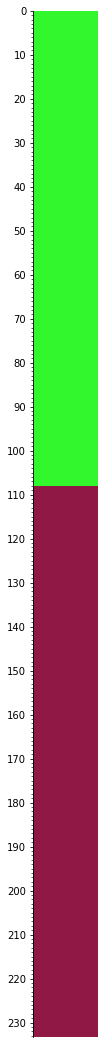

In [40]:
strip.plot()
#strip.plot(legend=legend, aspect=5)

In [41]:
l = u"""colour, width, component lithology
#F7E9A6, 3, Sandstone
#FF99CC, 2, CYST
#86F0B6, 5, Conglomerate
#F2FF42, 4, Sand
#FFE040, 4, Calksilicate
#FF4C4A, 2, Pegmatite 
#363434, 1, Gneiss 
#664A4A, 1, Clay
#FF99CC, 1, Granite"""

In [42]:
#legend = Legend.from_csv(text=l)
#legend[:10]
legend=Legend.default()

In [44]:
pruned = strip.prune(limit=40.0, keep_ends=True)
annealed = pruned.anneal()
merged = annealed.merge_neighbours()

In [47]:
from welly import Curve
todepth=join['todepth'].to_numpy()
density=join['Fe_pct'].to_numpy()
density_curve = Curve(data=density, basis=todepth)
strip.extract(density_curve, basis=todepth, name='Fe_pct')

example=join['K2O_pct'].to_numpy()
curve = Curve(data=example, basis=todepth)
strip.extract(curve, basis=todepth, name='K2O_pct')
strip[1]

Interval({'top': Position({'middle': 1.0, 'units': 'm'}), 'base': Position({'middle': 2.0, 'units': 'm'}), 'description': '', 'data': {'Fe_pct': array([40.16]), 'K2O_pct': array([0.006])}, 'components': [Component({'lithology': 'banded_iron_formation'})]})

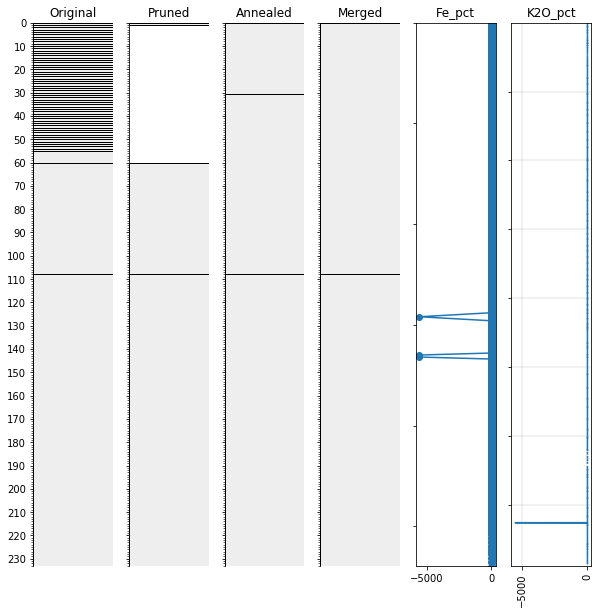

In [49]:
fig, axs = plt.subplots(ncols=6, figsize=(10, 10))

axs[0] = strip.plot(legend=legend, ax=axs[0], lw=1, aspect=5)
axs[0].set_title('Original')
axs[1] = pruned.plot(legend=legend, ax=axs[1], lw=1, aspect=5)
axs[1].set_yticklabels([])
axs[1].set_title('Pruned')
axs[2] = annealed.plot(legend=legend, ax=axs[2], lw=1, aspect=5)
axs[2].set_yticklabels([])
axs[2].set_title('Annealed')
axs[3] = merged.plot(legend=legend, ax=axs[3], lw=1, aspect=5)
axs[3].set_yticklabels([])
axs[3].set_title('Merged')
#axs[4]=density_curve.plot(ax=axs[4])
axs[4].plot(density, todepth,'-o')
axs[4].set_ylim(269.9, 0)
axs[4].set_yticklabels([])
axs[4].set_title('Fe_pct')
axs[5]=curve.plot(ax=axs[5])
axs[5].set_yticklabels([])
axs[5].set_title('K2O_pct')
plt.show()